# Census Income Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

Importing required modules

In [2]:
cs=pd.read_csv('census.csv')

Importing Dataset

In [3]:
cs.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Sample data of data set

We want to find whether person have income of less than 50k or greater than 50k,so we want to build classification model

In [4]:
cs.shape

(32560, 15)

Dataset have 32560 rows and 15 columns

In [5]:
cs.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Datatypes of the columns,data set have integer and categorical data

In [6]:
cs.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Dataset have no missing values 

In [7]:
cs.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Statistical measures,minimum age is 17  and maximum age is 90,capital gain maximum is upto 99999 ,capital loss maximum is 4356

In [8]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can observe the memory usage of dataset

In [9]:
cs.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

unique values for each column

# Visualizations

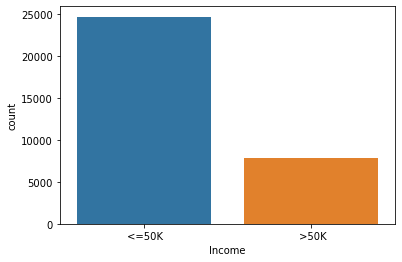

In [10]:
sns.countplot('Income',data=cs)
plt.show()

Dataset have more persons which have income of <50k

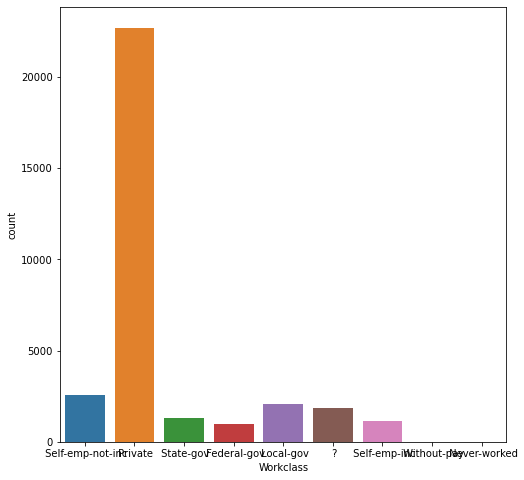

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [11]:
plt.figure(figsize=(8,8))
sns.countplot('Workclass',data=cs)
plt.show()
print(cs['Workclass'].value_counts())

Here more of the work class have private but also we can observe a question mark '?' present in column we want to treat it like traeting missing values

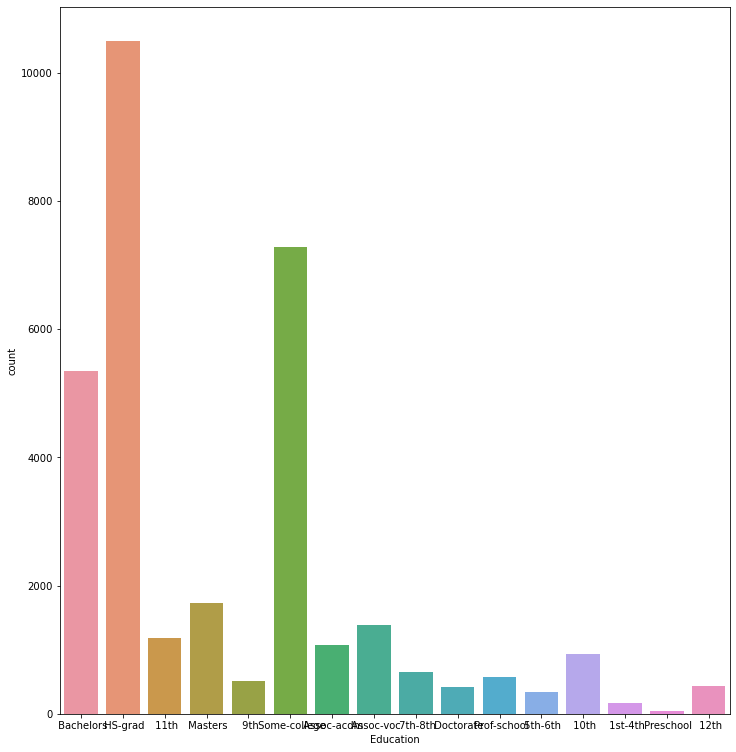

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


In [12]:
plt.figure(figsize=(12,13))
sns.countplot('Education',data=cs)
plt.show()
print(cs['Education'].value_counts())

High school grade education are present more

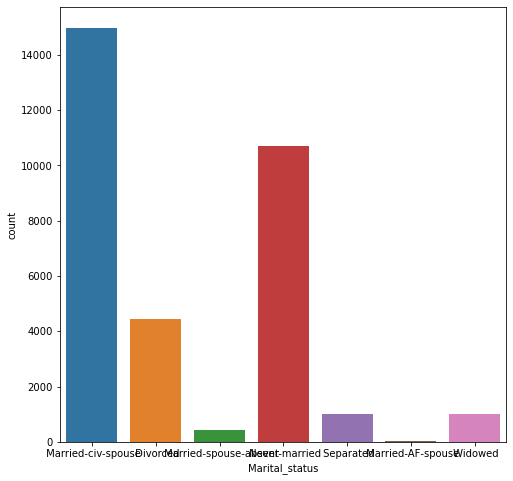

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


In [13]:
plt.figure(figsize=(8,8))
sns.countplot('Marital_status',data=cs)
plt.show()
print(cs['Marital_status'].value_counts())

Counts of marital status,most of the spouse civilians and armed forces spouses were less

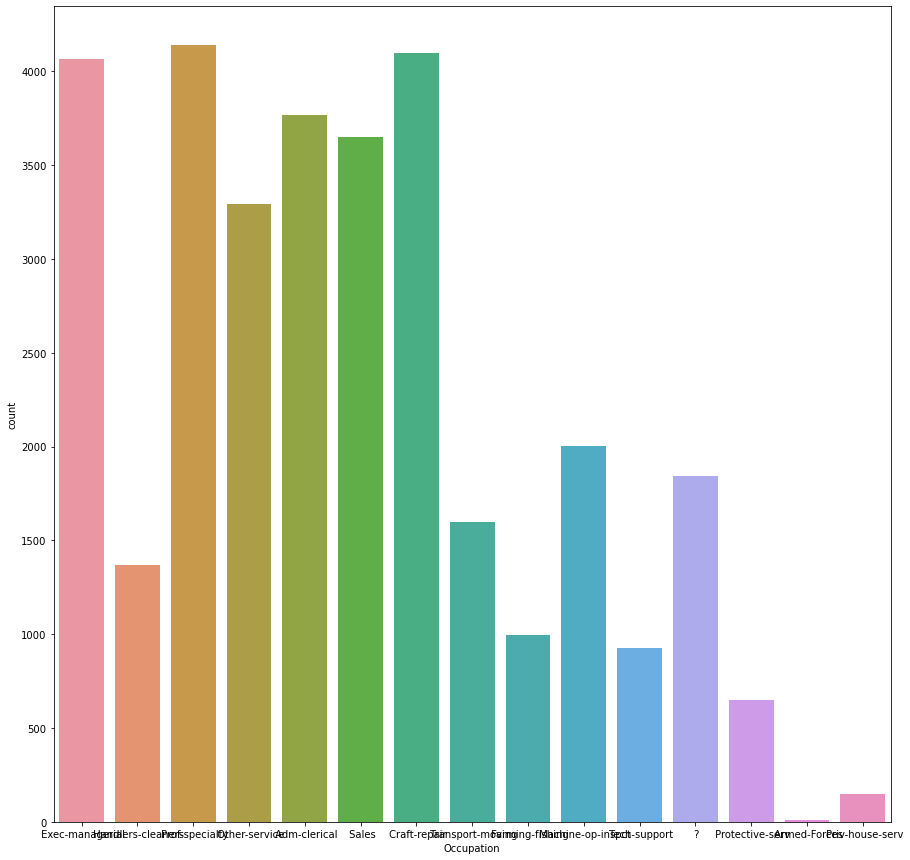

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


In [14]:
plt.figure(figsize=(15,15))
sns.countplot('Occupation',data=cs)
plt.show()
print(cs['Occupation'].value_counts())

Here also the question mark (?) present we want to treat it

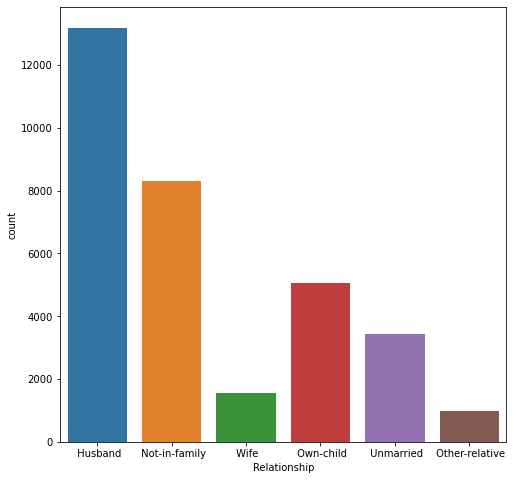

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


In [15]:
plt.figure(figsize=(8,8))
sns.countplot('Relationship',data=cs)
plt.show()
print(cs['Relationship'].value_counts())

Counts of ralationship

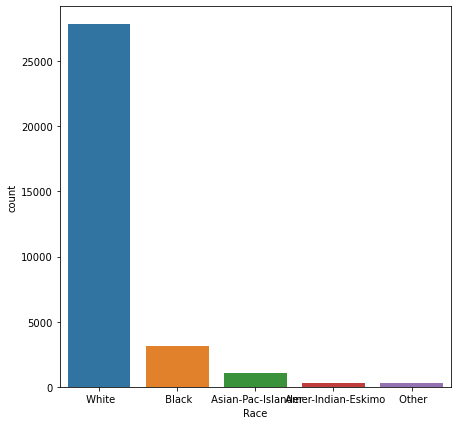

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


In [16]:
plt.figure(figsize=(7,7))
sns.countplot('Race',data=cs)
plt.show()
print(cs['Race'].value_counts())

Most of the persons are white

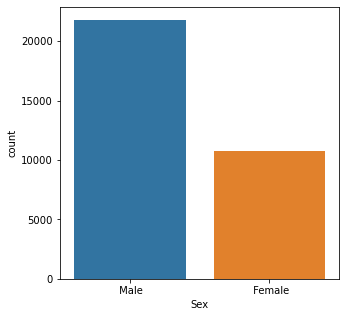

 Male      21789
 Female    10771
Name: Sex, dtype: int64


In [17]:
plt.figure(figsize=(5,5))
sns.countplot('Sex',data=cs)
plt.show()
print(cs['Sex'].value_counts())

Most of persons are male

In [18]:
print(cs['Native_country'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Most of persons are americans and also here we can observe the question mark upto 583 datas

Now we observe '?' in columns occupation,workclass and nativecountry.

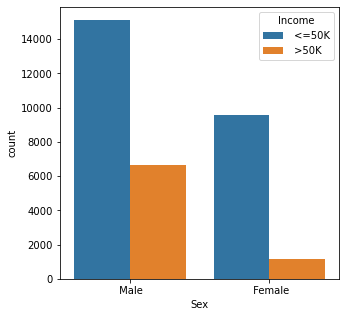

In [19]:
plt.figure(figsize=(5,5))
sns.countplot('Sex',data=cs,hue='Income')
plt.show()

In both income males are more

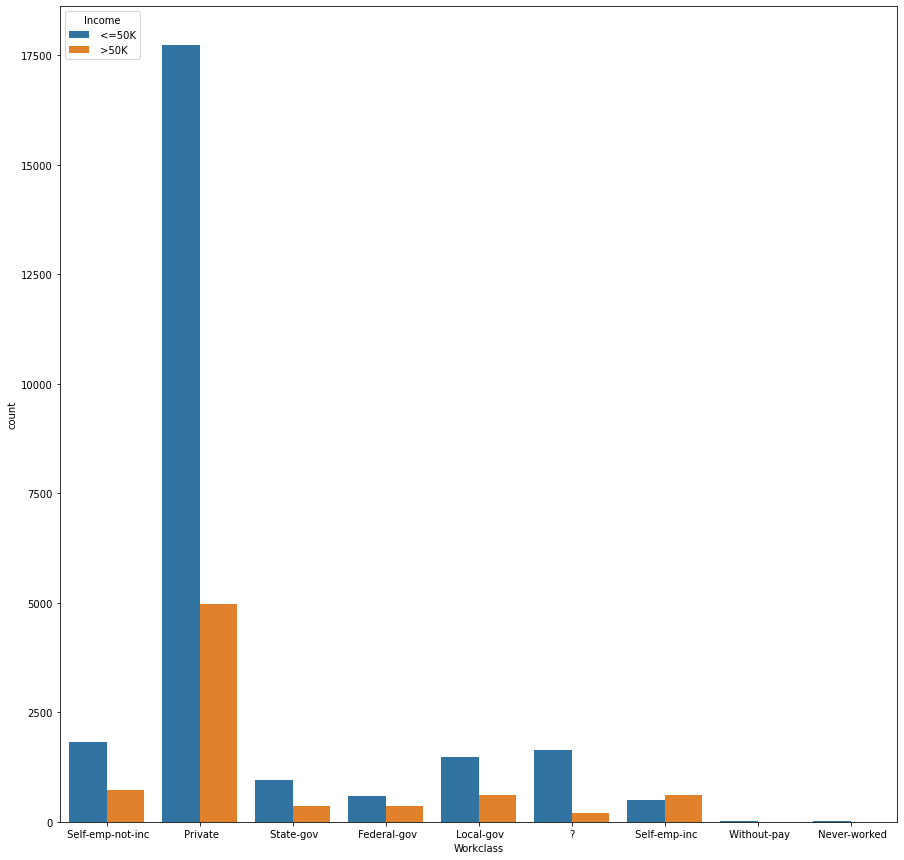

In [20]:
plt.figure(figsize=(15,15))
sns.countplot('Workclass',data=cs,hue='Income')
plt.show()

Most of incomes where from private work class

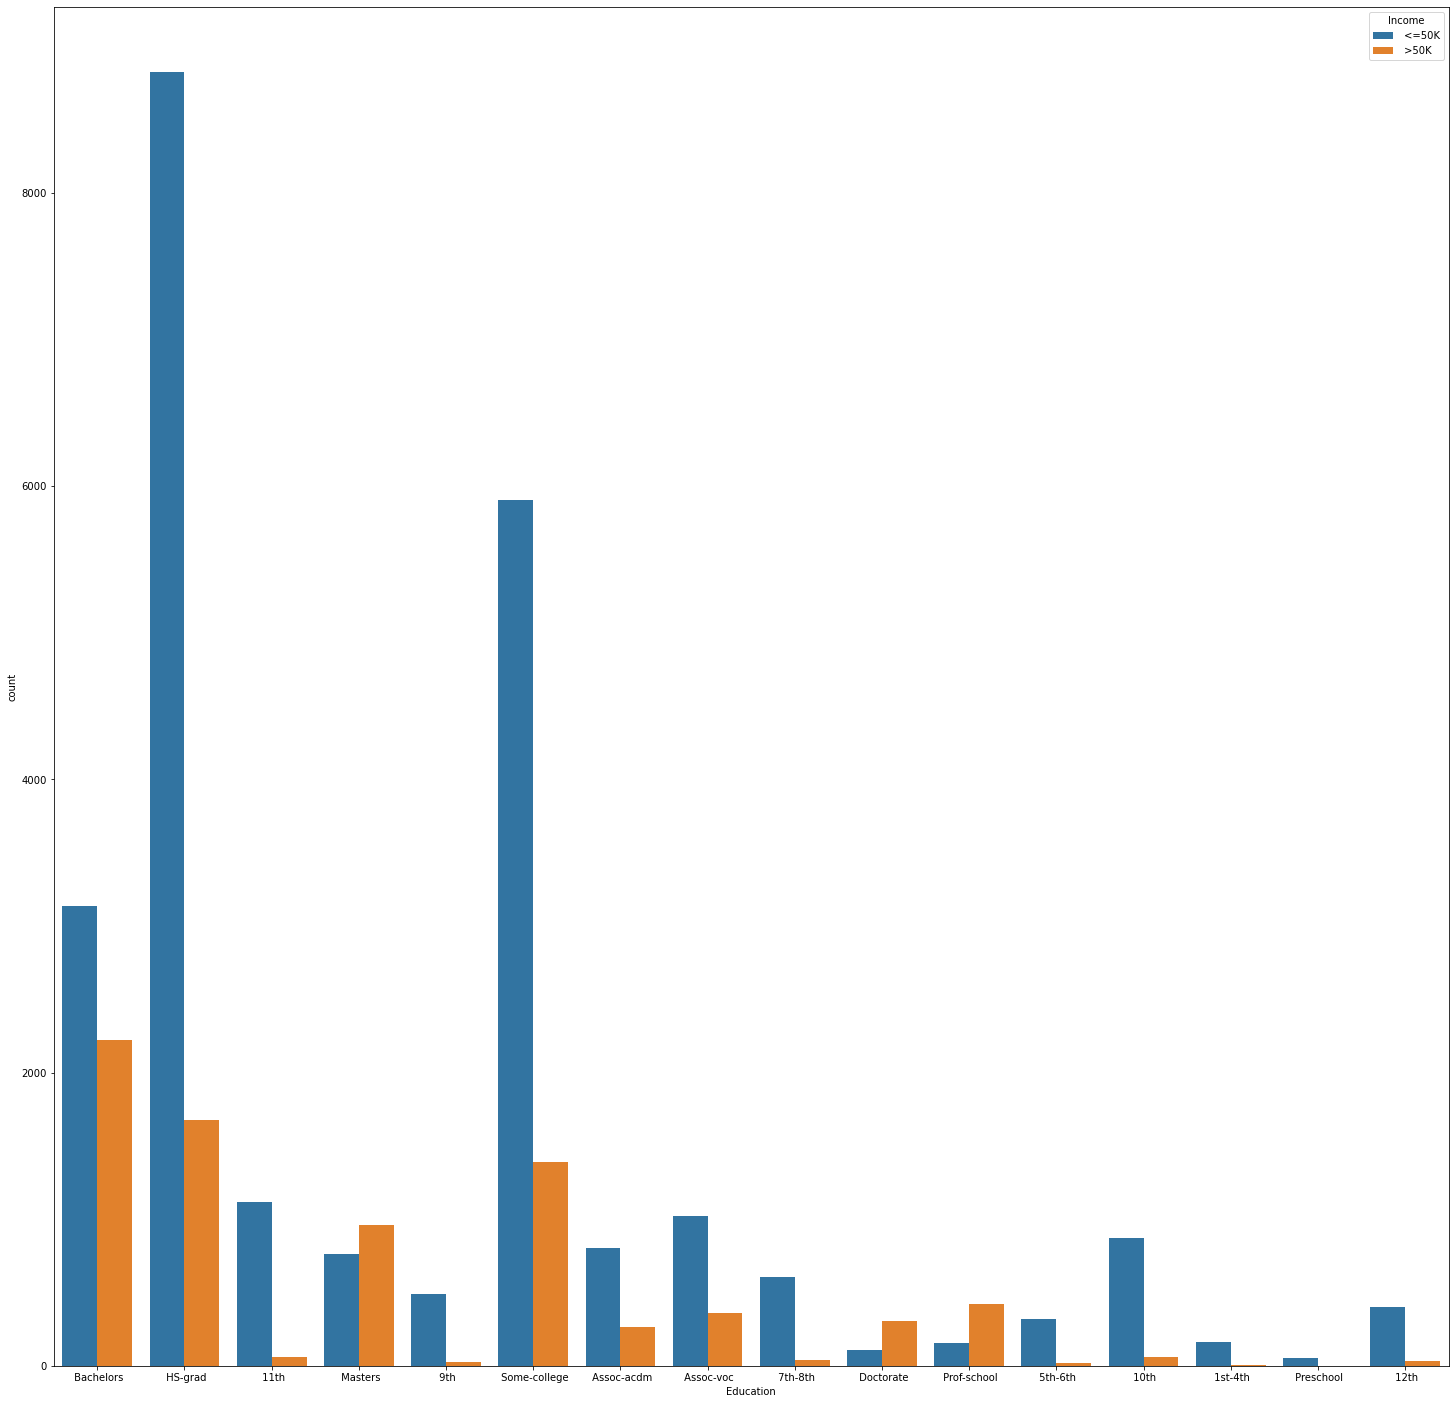

In [21]:
plt.figure(figsize=(25,25))
sns.countplot('Education',data=cs,hue='Income')
plt.show()

Most of income <50k is from high school graduates and >50k from bachelors

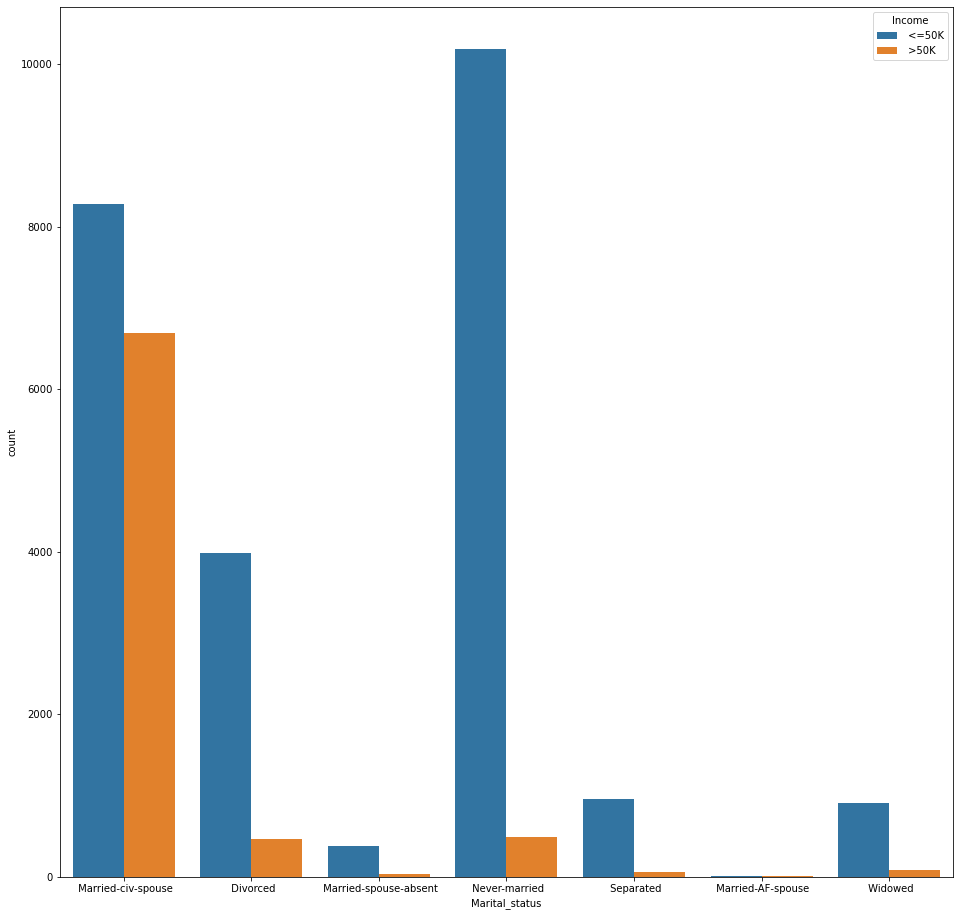

In [22]:
plt.figure(figsize=(16,16))
sns.countplot('Marital_status',data=cs,hue='Income')
plt.show()

Incomes with <50k are not married people and income with >50k are married with civilians

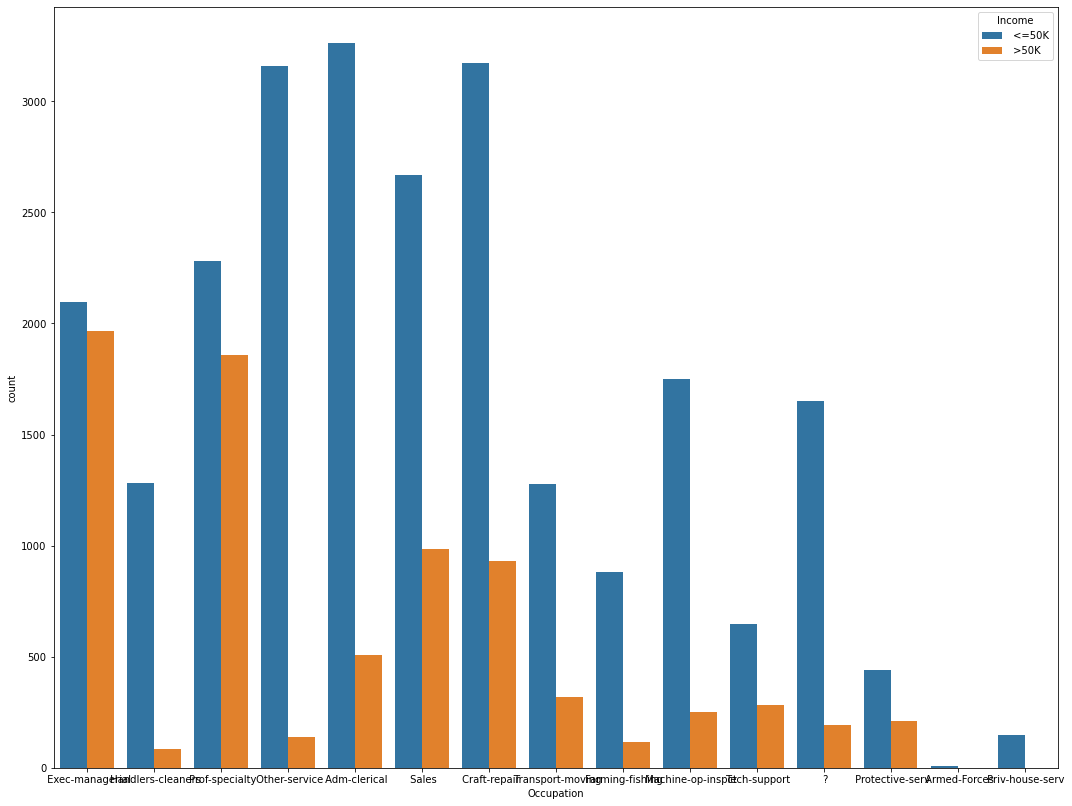

In [23]:
plt.figure(figsize=(18,14))
sns.countplot('Occupation',data=cs,hue='Income')
plt.show()

Most of the income <50k where have occupation administrative clerks and >50k are executive managers

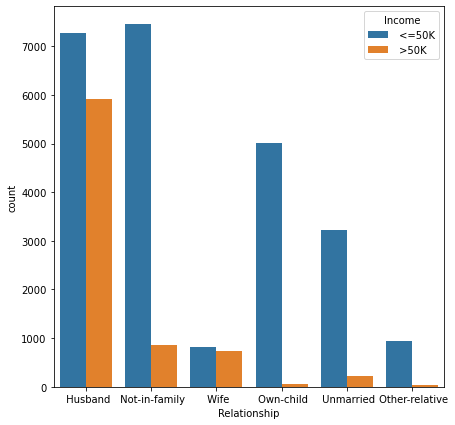

In [24]:
plt.figure(figsize=(7,7))
sns.countplot('Relationship',data=cs,hue='Income')
plt.show()

Not in family have highest <50k income and 'Husband' have more income of >50k

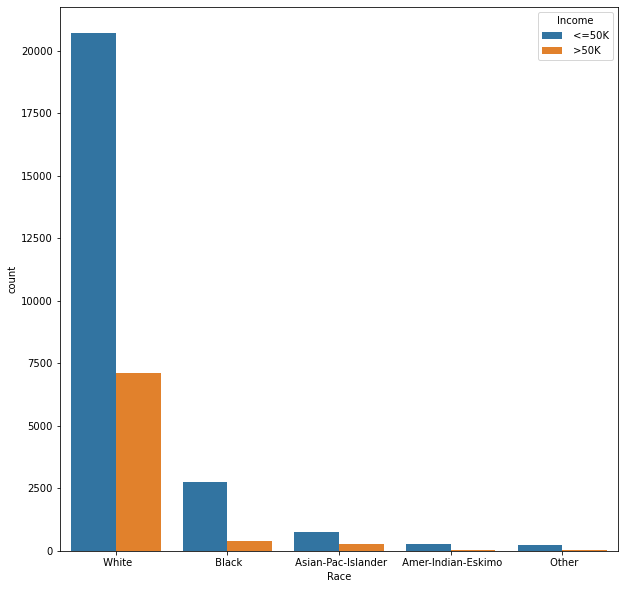

In [25]:
plt.figure(figsize=(10,10))
sns.countplot('Race',data=cs,hue='Income')
plt.show()

 White have both incomes more than others

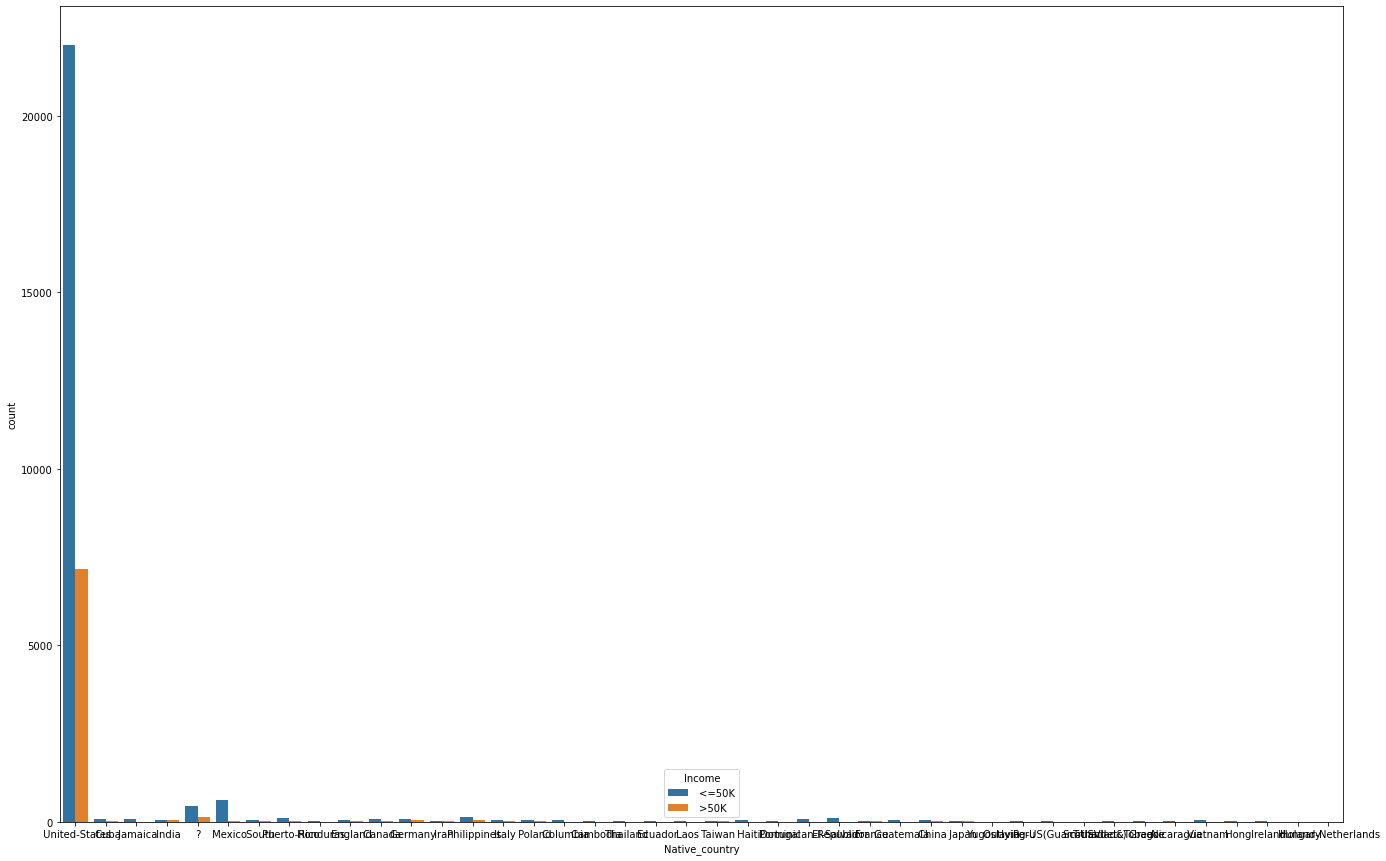

In [26]:
plt.figure(figsize=(23,15))
sns.countplot('Native_country',data=cs,hue='Income')
plt.show()

Both incomes are more in united states

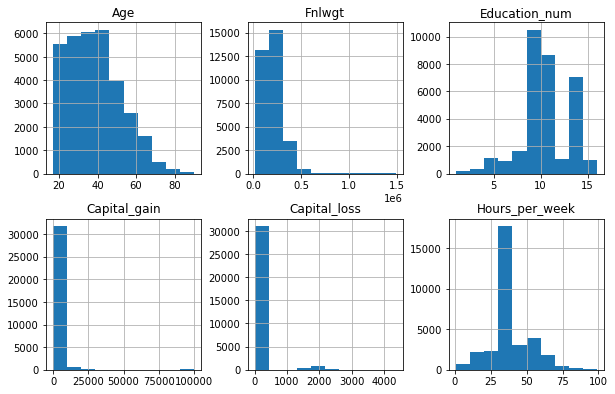

In [27]:
cs.hist(figsize=(10,10),layout=(3,3))
plt.show()

Most of the ages in between 20-50,maximum people working between 30-40 hours

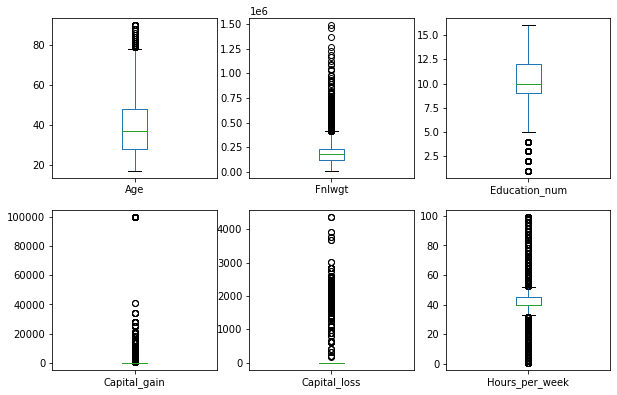

In [28]:
cs.plot(kind='box',figsize=(10,10),layout=(3,3),sharex=False,subplots=True)
plt.show()

Outliers present in columns

In [29]:
cs.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [30]:
education_pivot=cs.pivot_table(index='Education',values='Education_num',aggfunc=np.median)

Comparing numeical and categorical table using pivot table

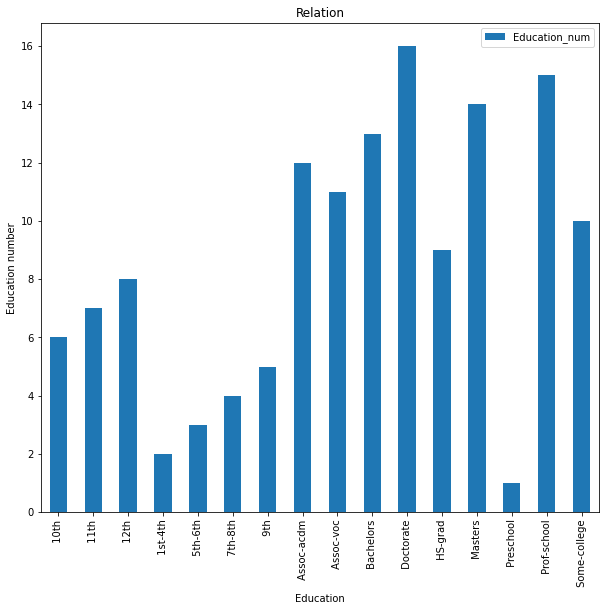

In [31]:
#plotting 
education_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("Education")
plt.ylabel("Education number")
plt.title("Relation")
plt.show()

Pre school number is 1 and doctorate number is 16

# Data Cleaning

The question mark '?' presents in categorical tables so I use mode to replace it

In [32]:
cs['Workclass'].mode()[0]

' Private'

The mode of column 'workclass' is 'Private' so I replace with it

In [33]:
cs['Occupation'].mode()[0]

' Prof-specialty'

In this column mode is 'Prof-specialty'

In [34]:
cs['Native_country'].mode()[0]

' United-States'

In this column mode is United states so i replace with it

In [35]:
cs['Workclass'] = cs['Workclass'].apply(lambda x: x.replace('?', 'Private'))

cs['Occupation']=cs['Occupation'].apply(lambda x: x.replace('?', 'Prof-specialty'))

cs['Native_country']=cs['Native_country'].apply(lambda x: x.replace('?', 'United-States'))

replaced '?' using mode of each column

In [36]:
cs.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,Private,202822,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,Private,129912,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


Replaced '?'

In [37]:
cs['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Now there is no '?'

# Encoding

In [38]:
cs['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

We can encode this column using label encoding, this is our target variable which have imbalance in the data

In [39]:
cs['Income']=LabelEncoder().fit_transform(cs['Income'])

Encoded using labl encoder

In [40]:
cs['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

<50k replaced with 0 and >50k replaced with 1

# Correlation

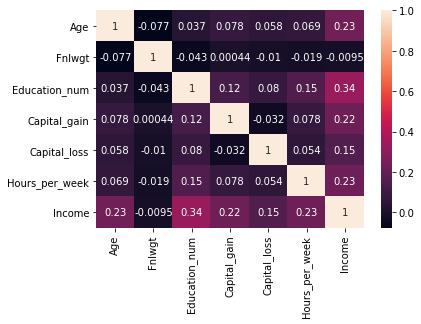

In [41]:
sns.heatmap(cs.corr(),annot=True)
plt.show()

Age is correlated to income,capital losss and gain affect in income

Encoding

In [42]:
le=LabelEncoder()
var=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']
#storing column names to encode

for i in var:
    cs[i]=le.fit_transform(cs[i])

Encoded features using label encoding

In [43]:
cs.head(6)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0


Now we can observe all categorical data encoded

# Seperating Features and Target

In [44]:
x=cs.drop('Income', axis = 1)
y = cs['Income']

Seperated features and target

In [45]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38


Sample features

In [46]:
pd.DataFrame(y.head())

,Income
0,0
1,0
2,0
3,0
4,0


Sample target values

# Scaling

In [47]:
sc=StandardScaler()
x=sc.fit_transform(x)

Scaled features

# Balancing Target Variable

# Over Sampling

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

 Class balanced using smote

In [49]:
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

Balanced

# Model Building

In [50]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.7654404228922811
At random state 0,the testing accuracy is:- 0.7774271844660194


At random state 1,the training accuarcy is:- 0.7690004854630779
At random state 1,the testing accuracy is:- 0.764967637540453


At random state 2,the training accuarcy is:- 0.7670316629807433
At random state 2,the testing accuracy is:- 0.7720064724919093


At random state 2 model performs well
At random state 3,the training accuarcy is:- 0.7672474243486703
At random state 3,the testing accuracy is:- 0.7682847896440129


At random state 3 model performs well
At random state 4,the training accuarcy is:- 0.7698095905928044
At random state 4,the testing accuracy is:- 0.7617313915857605


At random state 5,the training accuarcy is:- 0.7699714116187497
At random state 5,the testing accuracy is:- 0.762378640776699


At random state 6,the training accuarcy is:- 0.768730783753169
At random state 6,the testing accuracy is:- 0.7674757281553398


At random state 6 model 

At random state 52,the training accuarcy is:- 0.7656292140892174
At random state 52,the testing accuracy is:- 0.7744336569579288


At random state 52 model performs well
At random state 53,the training accuarcy is:- 0.7662225578510168
At random state 53,the testing accuracy is:- 0.7745954692556635


At random state 53 model performs well
At random state 54,the training accuarcy is:- 0.7689735152920869
At random state 54,the testing accuracy is:- 0.7671521035598705


At random state 54 model performs well
At random state 55,the training accuarcy is:- 0.7713199201682939
At random state 55,the testing accuracy is:- 0.7581715210355987


At random state 56,the training accuarcy is:- 0.7686229030692054
At random state 56,the testing accuracy is:- 0.7669093851132686


At random state 56 model performs well
At random state 57,the training accuarcy is:- 0.7677598575974972
At random state 57,the testing accuracy is:- 0.7674757281553398


At random state 57 model performs well
At random state 58,

At random state 104,the training accuarcy is:- 0.7697556502508226
At random state 104,the testing accuracy is:- 0.7639967637540453


At random state 105,the training accuarcy is:- 0.7688656346081234
At random state 105,the testing accuracy is:- 0.7668284789644013


At random state 105 model performs well
At random state 106,the training accuarcy is:- 0.7679216786234425
At random state 106,the testing accuracy is:- 0.7694174757281553


At random state 106 model performs well
At random state 107,the training accuarcy is:- 0.7684071417012784
At random state 107,the testing accuracy is:- 0.7669902912621359


At random state 107 model performs well
At random state 108,the training accuarcy is:- 0.7672474243486703
At random state 108,the testing accuracy is:- 0.7709546925566343


At random state 108 model performs well
At random state 109,the training accuarcy is:- 0.7688656346081234
At random state 109,the testing accuracy is:- 0.7675566343042072


At random state 109 model performs well
At

At random state 154,the training accuarcy is:- 0.7688386644371326
At random state 154,the testing accuracy is:- 0.7651294498381876


At random state 154 model performs well
At random state 155,the training accuarcy is:- 0.7688116942661416
At random state 155,the testing accuracy is:- 0.7682038834951457


At random state 155 model performs well
At random state 156,the training accuarcy is:- 0.7675710664005609
At random state 156,the testing accuracy is:- 0.7694174757281553


At random state 156 model performs well
At random state 157,the training accuarcy is:- 0.765683154431199
At random state 157,the testing accuracy is:- 0.7736245954692557


At random state 157 model performs well
At random state 158,the training accuarcy is:- 0.771751442904148
At random state 158,the testing accuracy is:- 0.7607605177993527


At random state 159,the training accuarcy is:- 0.7695938292248773
At random state 159,the testing accuracy is:- 0.763673139158576


At random state 160,the training accuarcy is:

Splitted data into train and testdata,finding best random states for logistic regression

In [51]:
l

[2,
 3,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 47,
 48,
 50,
 52,
 53,
 54,
 56,
 57,
 58,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 109,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 149,
 151,
 152,
 154,
 155,
 156,
 157,
 160,
 163,
 164,
 165,
 167,
 168,
 169,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 197,
 198,
 199]

List of best random states

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6201
           1       0.77      0.77      0.77      6159

    accuracy                           0.77     12360
   macro avg       0.77      0.77      0.77     12360
weighted avg       0.77      0.77      0.77     12360

[[4784 1417]
 [1430 4729]]


Apply best random state,print accuracy score and confusion matrix

In [53]:
#decision tree classifier
dt=DecisionTreeClassifier()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 0.9999730298290092
At random state 0,the testing accuracy is:- 0.8539644012944984


At random state 1,the training accuarcy is:- 0.9999730298290092
At random state 1,the testing accuracy is:- 0.857200647249191


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.8543689320388349


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.8572815533980582


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.8498381877022654


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.8507281553398058


At random state 6,the training accuarcy is:- 0.9999730298290092
At random state 6,the testing accuracy is:- 0.857200647249191


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.8532362459546926


At random state 8,the training accuarcy is:- 

At random state 66,the training accuarcy is:- 1.0
At random state 66,the testing accuracy is:- 0.8521844660194174


At random state 67,the training accuarcy is:- 0.9999730298290092
At random state 67,the testing accuracy is:- 0.8480582524271845


At random state 68,the training accuarcy is:- 0.9999730298290092
At random state 68,the testing accuracy is:- 0.8526699029126213


At random state 69,the training accuarcy is:- 0.9999730298290092
At random state 69,the testing accuracy is:- 0.8533171521035599


At random state 70,the training accuarcy is:- 1.0
At random state 70,the testing accuracy is:- 0.8508899676375404


At random state 71,the training accuarcy is:- 0.9999730298290092
At random state 71,the testing accuracy is:- 0.8509708737864078


At random state 72,the training accuarcy is:- 0.9999730298290092
At random state 72,the testing accuracy is:- 0.8467637540453075


At random state 73,the training accuarcy is:- 0.9999730298290092
At random state 73,the testing accuracy is:- 0.8

At random state 131,the training accuarcy is:- 1.0
At random state 131,the testing accuracy is:- 0.8570388349514563


At random state 132,the training accuarcy is:- 0.9999730298290092
At random state 132,the testing accuracy is:- 0.8512135922330097


At random state 133,the training accuarcy is:- 0.9999730298290092
At random state 133,the testing accuracy is:- 0.8530744336569579


At random state 134,the training accuarcy is:- 0.9999730298290092
At random state 134,the testing accuracy is:- 0.8483009708737864


At random state 135,the training accuarcy is:- 1.0
At random state 135,the testing accuracy is:- 0.8541262135922331


At random state 136,the training accuarcy is:- 0.9999730298290092
At random state 136,the testing accuracy is:- 0.8577669902912621


At random state 137,the training accuarcy is:- 1.0
At random state 137,the testing accuracy is:- 0.852588996763754


At random state 138,the training accuarcy is:- 1.0
At random state 138,the testing accuracy is:- 0.8507281553398058

At random state 196,the training accuarcy is:- 0.9999730298290092
At random state 196,the testing accuracy is:- 0.8533171521035599


At random state 197,the training accuarcy is:- 0.9999730298290092
At random state 197,the testing accuracy is:- 0.8524271844660194


At random state 198,the training accuarcy is:- 1.0
At random state 198,the testing accuracy is:- 0.8516181229773463


At random state 199,the training accuarcy is:- 0.9999730298290092
At random state 199,the testing accuracy is:- 0.8524271844660194




Splitted data into trained and testdata,finding best random state for decision tree

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6201
           1       0.85      0.85      0.85      6159

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360

[[5264  937]
 [ 905 5254]]


Splitted data into train and test data,finding best random states

In [55]:
#Random Forest classifier 
rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6201
           1       0.89      0.91      0.90      6159

    accuracy                           0.90     12360
   macro avg       0.90      0.90      0.90     12360
weighted avg       0.90      0.90      0.90     12360

[[5514  687]
 [ 562 5597]]


Applied best random state and print accuracy score and confusion matrix for random forest

In [56]:
#adaboostclassifier
ad=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=200)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
acc_a=classification_report(y_test,predad)
print(acc_a)
print(confusion_matrix(y_test,predad))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      6189
           1       0.83      0.88      0.85      6171

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360

[[5066 1123]
 [ 768 5403]]


Applied random state 200 and print confusion matrix and accuracy score for adaboost classifier

# Cross Validation Score

In [57]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Adaboost classifier:",cross_val_score(ad,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predad))

CV score and it's mean of Logistic Regression: 0.7681338615081565 Accuracy score: 0.5013754045307444
CV score and it's mean of Decision Tree Classifier: 0.8544452521092687 Accuracy score: 0.4961165048543689
CV score and it's mean of Random Forest: 0.901231010165447 Accuracy score: 0.4937702265372168
CV score and it's mean of Adaboost classifier: 0.8490640504611349 Accuracy score: 0.8470064724919094


CV score and accuracy score of adaboost classifier is same so I proceed with adaboostclassifier

# Hyper Parameter Tuning

In [58]:
parameters={'n_estimators':np.arange(40,60),'learning_rate':[1.0,2.0,3.0,4.0],'algorithm':['SAMME','SAMME.R'],
          'random_state':np.arange(10,20)}

Stored parameters of adaboost in a variable

In [59]:
gsv=GridSearchCV(ad,parameters,cv=8)

Call gridsearch cv with parameters, gives cv=8

In [62]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59]),
                         'random_state': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

Fitted data

In [63]:
gsv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 58,
 'random_state': 10}

Best parameters

In [64]:
best=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=58,random_state=10)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

84.668284789644


Applied best parameters  for final model

# AUC ROC Curve

In [65]:
#predicting probabilities
y_pred_proba=best.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

array([0.52477113, 0.50232722, 0.49688061, ..., 0.4981426 , 0.48543942,
       0.50682069])

In [66]:
#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

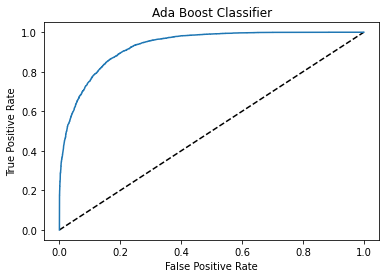

In [67]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost Classifier')
plt.show()

AUC curve is fine

# Saving Model

In [68]:
import joblib as jb
jb.dump(best,"Best_Model.pkl")

['Best_Model.pkl']

Model Saved

# Conclusion

In [69]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
INCOME=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
INCOME

,Original:,Predicted
0,1,1
1,0,1
2,0,0
3,1,1
4,0,1
...,...,...
12355,1,1
12356,1,0
12357,0,0
12358,0,0


Original and predicted value